# Task 2: Quantitative Analysis
## 1. Data Acquisition and Preparation
We will fetch historical stock data for Apple Inc. (AAPL) using the `yfinance` library.
We need the standard OHLCV data (Open, High, Low, Close, Volume).

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
# Import TA-Lib. If this fails, you need to resolve installation issues first.
import talib as ta

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# --- Define Parameters ---
STOCK_SYMBOL = 'AAPL'
START_DATE = '2023-01-01'
END_DATE = '2024-01-01'

# --- Fetch Data ---
# yfinance downloads data directly into a pandas DataFrame
df_stock = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)

# --- Inspection ---
# Check if we have the required columns: Open, High, Low, Close, Volume
print("Data Shape:", df_stock.shape)
print("\nColumns available:", df_stock.columns)

# Look at the first few rows. Note the Index is the Date.
display(df_stock.head())

# Check for missing values (Crucial for financial data)
print("\nMissing Values:\n", df_stock.isnull().sum())

C:\Users\FORWARD\AppData\Local\Temp\ipykernel_14688\57410122.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_stock = yf.download(STOCK_SYMBOL, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


Data Shape: (250, 5)

Columns available: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482025,126.747845,123.221050,125.004147,89113600
2023-01-05,123.161949,125.871079,122.905819,125.240591,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800



Missing Values:
 Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


## 2. Technical Indicators Calculation using TA-Lib
We will calculate three key indicators based on the 'Close' price:
1.  **SMA (Simple Moving Average):** A 20-day trend smoother.
2.  **RSI (Relative Strength Index):** A momentum indicator identifying overbought (>70) or oversold (<30) conditions.
3.  **MACD:** A trend-following momentum indicator showing the relationship between two moving averages.

In [7]:
# Ensure we are using the 'Close' price for calculations
close_prices = df_stock['Close']

# --- 1. Simple Moving Average (SMA) ---
# Calculate a 20-day SMA (short-term trend) and a 50-day SMA (medium-term trend)
# Ensure a 1-D Series is passed to TA-Lib (squeeze will convert a single-column DataFrame -> Series)
df_stock['SMA_20'] = ta.SMA(close_prices.squeeze(), timeperiod=20)
df_stock['SMA_50'] = ta.SMA(close_prices.squeeze(), timeperiod=50)


# --- 2. Relative Strength Index (RSI) ---
# Standard timeperiod for RSI is 14 days
df_stock['RSI_14'] = ta.RSI(close_prices.squeeze(), timeperiod=14)


# --- 3. MACD ---
# MACD usually takes three arguments: fast period (12), slow period (26), and signal period (9)
# It returns three arrays: The MACD line, the Signal line, and the Histogram (the difference)
macd, macd_signal, macd_hist = ta.MACD(close_prices.squeeze(), fastperiod=12, slowperiod=26, signalperiod=9)

# Add them to the dataframe
df_stock['MACD'] = macd
df_stock['MACD_Signal'] = macd_signal
# We usually look at the histogram to see the strength of the move
df_stock['MACD_Hist'] = macd_hist

# Drop NaN values created at the start of data by the lookback periods (e.g., SMA_50 needs 50 days of data before it starts)
df_stock.dropna(inplace=True)

# Verify the new columns exist
print("Dataframe with indicators appended:")
display(df_stock.tail(3))

Dataframe with indicators appended:


Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,192.154306,184.149427,53.354449,2.029104,2.845144,-0.816040
2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900,192.362837,184.479570,54.541003,1.823998,2.640915,-0.816917
2023-12-29,190.728745,192.581244,189.936226,192.085922,42672100,192.490630,184.814831,51.121254,1.559537,2.424639,-0.865103


## 3. Visualization of Price and Indicators
Visualizing the stock price alongside the calculated indicators to identify potential trading signals.
- Top Panel: Stock Price alongside SMA_20 and SMA_50.
- Middle Panel: RSI with overbought (70) and oversold (30) thresholds.
- Bottom Panel: MACD Histogram showing momentum shifts.

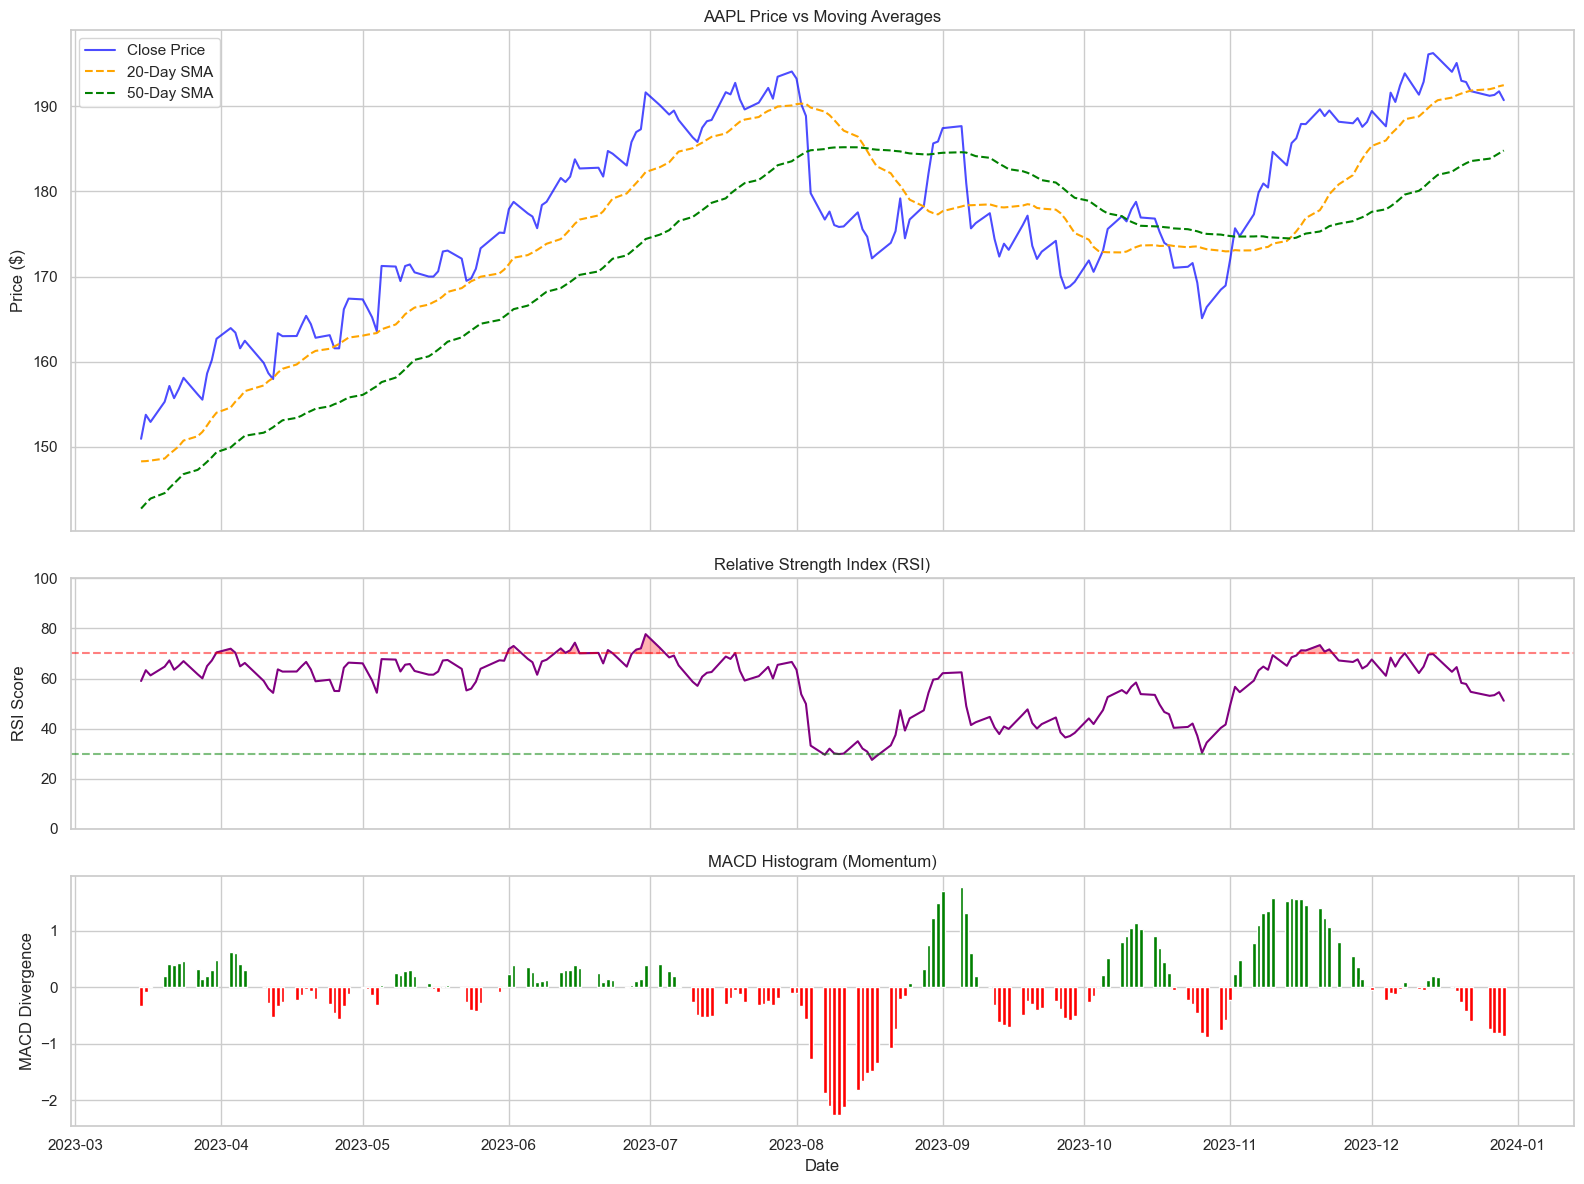

In [8]:
# Create a figure with 3 subplots (rows=3, cols=1), sharing the x-axis (Date)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})

# --- Plot 1: Price & Moving Averages ---
ax1.set_title(f'{STOCK_SYMBOL} Price vs Moving Averages')
ax1.plot(df_stock.index, df_stock['Close'], label='Close Price', color='blue', linewidth=1.5, alpha=0.7)
ax1.plot(df_stock.index, df_stock['SMA_20'], label='20-Day SMA', color='orange', linestyle='--')
ax1.plot(df_stock.index, df_stock['SMA_50'], label='50-Day SMA', color='green', linestyle='--')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')

# --- Plot 2: RSI ---
ax2.set_title('Relative Strength Index (RSI)')
ax2.plot(df_stock.index, df_stock['RSI_14'], color='purple')
# Add overbought/oversold lines
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
ax2.axhline(30, linestyle='--', alpha=0.5, color='green')
ax2.set_ylim(0, 100) # RSI is always between 0 and 100
ax2.set_ylabel('RSI Score')
ax2.fill_between(df_stock.index, y1=df_stock['RSI_14'], y2=70, where=(df_stock['RSI_14']>=70), color='red', alpha=0.3)
ax2.fill_between(df_stock.index, y1=df_stock['RSI_14'], y2=30, where=(df_stock['RSI_14']<=30), color='green', alpha=0.3)


# --- Plot 3: MACD Histogram ---
ax3.set_title('MACD Histogram (Momentum)')
# Plotting the histogram. Green for positive momentum, red for negative.
colors = ['green' if v >= 0 else 'red' for v in df_stock['MACD_Hist']]
ax3.bar(df_stock.index, df_stock['MACD_Hist'], color=colors)
ax3.set_ylabel('MACD Divergence')

# Final layout touches
plt.xlabel('Date')
plt.tight_layout()
plt.show()

RSI mostly traded in the 60–70 range (moderate bullish bias). In August it dropped to ~30 for ~15 days (sustained oversold), rebounded to ~60 at the start of September then weakened to ~40, and touched ~30 again in October. Repeated RSI oversold readings point to short-lived sell-offs inside a broader uptrend — use price support and MACD confirmation before acting on reversals.

In August, the MACD histogram was deeply negative (below 0, near -2), signaling strong bearish momentum. By October, the MACD turned positive and continued to rise, reaching high levels in November. This shift reflects a transition from pronounced downside pressure to strong bullish momentum, confirming a trend reversal and sustained buying interest.